In [3]:
import sys
sys.path.append('../src')

import redshift_cross_correlation as mrc
import redshift_cc_sdss as crs

0.13608694

>> Best overall match: Template 005 with z = 1.91000, score = -4638.283


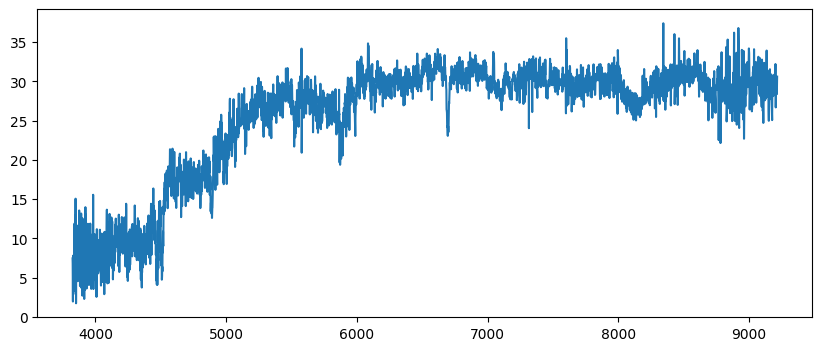

In [4]:
flux, wavelength, true_z = crs.get_spectrum(plate=2663, mjd=54234, fiberID=332)
template_spectra = crs.get_template_spectra(type_str='GALAXY')
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(wavelength, flux)

print(true_z)

template, redshift, correlation = mrc.cross_correlate_redshift(wavelength, flux, template_spectra)

2.8305912

>> Best overall match: Template 024 with z = 0.23800, score = -2326.143


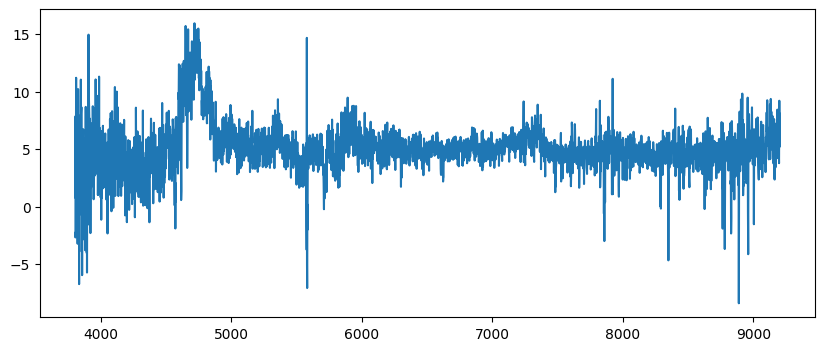

In [5]:
flux, wavelength, true_z = crs.get_spectrum(plate=266, mjd=51602, fiberID=9)
template_spectra = crs.get_template_spectra(type_str='ALL')
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(wavelength, flux)

print(true_z)

template, redshift, correlation = mrc.cross_correlate_redshift(wavelength, flux, template_spectra)

In [6]:
from astroquery.sdss import SDSS
from astropy.table import Table

query = """
SELECT TOP 100 plate, mjd, fiberID
FROM SpecObj
WHERE class IN ('GALAXY', 'QSO', 'STAR')
AND zWarning = 0
ORDER BY NEWID()  -- randomize results
"""

results = SDSS.query_sql(query)

results = results[:]
print(results)


plate  mjd  fiberID
----- ----- -------
  547 51959     150
  293 51689     451
 7851 56932     454
 6287 56221     190
 5701 55949     213
 4441 55532     168
10737 58254     158
 7407 56772     659
  476 52314     216
 6725 56390      57
  ...   ...     ...
 6460 56334     818
 9146 58042     163
10459 58159     121
 6295 56536     668
 2926 54625     257
 4213 55449     753
 8202 58158     142
 5799 56325     516
 2360 53728     518
 5154 55864      17
Length = 100 rows


In [ ]:
template_spectra = crs.get_template_spectra('ALL')
triplets = list(zip(results['plate'], results['mjd'], results['fiberID']))

for plate, mjd, fiber in triplets:
    flux, wavelength, true_z = crs.get_spectrum(plate=plate, mjd=mjd, fiberID=fiber)
    if flux.all() != None and wavelength.all() != None and true_z != None:
        best_temp , z, score = mrc.cross_correlate_redshift(wavelength, flux, template_spectra)
        print(f"The error percentage of spectra plate={plate}, mjd={mjd}, fiberID={fiber} with redshift {true_z} is {(z-true_z)/true_z * 100}\n")
    else:
        print('Spectra not found.')





>> Best overall match: Template 000 with z = 0.00200, score = -4238.366
The error percentage of spectra plate=547, mjd=51959, fiberID=150 with redshift 0.1409015655517578 is -98.58056935551555



In [ ]:
import numpy as np

sample_rate = 1000
duration = 1
t = np.linspace(0, duration, int(sample_rate * duration))
freq = 50
amp = 1
signal = amp * np.sin(2 * np.pi * freq * t)

fourier = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), 1/sample_rate)